In [1]:
pip install pulp

     |████████████████████████████████| 17.7 MB 11.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pulp as pl

In [3]:
# Create a problem variable:
prob = pl.LpProblem("Vacation_Knapsack_Problem", pl.LpMaximize)

In [4]:
# Decision variables
items = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
values = {'A': 10, 'B': 8, 'C': 12, 'D': 4, 'E': 5, 'F': 10, 'G': 6, 'H': 9, 'I': 7, 'J': 9}
weights = {'A': 5, 'B': 7, 'C': 4, 'D': 3, 'E': 5, 'F': 3, 'G': 4, 'H': 6, 'I': 4, 'J': 6}
x = pl.LpVariable.dicts("item", items, 0, 1, pl.LpBinary)

In [5]:
# Objective function
prob += pl.lpSum([values[i] * x[i] for i in items]), "Total Value of Items"

# Weight constraint
prob += pl.lpSum([weights[i] * x[i] for i in items]) <= 23, "Total Weight Constraint"

In [6]:
prob.solve()

1

In [3]:
# Create the LP problem
prob = pl.LpProblem("Vacation_Knapsack_Problem", pl.LpMaximize)

# Decision variables
items = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
values = {'A': 10, 'B': 8, 'C': 12, 'D': 4, 'E': 5, 'F': 10, 'G': 6, 'H': 9, 'I': 7, 'J': 9}
weights = {'A': 5, 'B': 7, 'C': 4, 'D': 3, 'E': 5, 'F': 3, 'G': 4, 'H': 6, 'I': 4, 'J': 6}
x = pl.LpVariable.dicts("item", items, 0, 1, pl.LpBinary)

# Objective function
prob += pl.lpSum([values[i] * x[i] for i in items]), "Total Value of Items"

# Weight constraint
prob += pl.lpSum([weights[i] * x[i] for i in items]) <= 23, "Total Weight Constraint"

# Solve the problem
prob.solve()

# Output results
print("Status:", pl.LpStatus[prob.status])
print("The items to be included in the bag to maximize the total value are:")
for item in items:
    if pl.value(x[item]) == 1:
        print(f"Item {item} with value €{values[item]} and weight {weights[item]}kg")

Status: Optimal
The items to be included in the bag to maximize the total value are:
Item A with value €10 and weight 5kg
Item C with value €12 and weight 4kg
Item D with value €4 and weight 3kg
Item F with value €10 and weight 3kg
Item G with value €6 and weight 4kg
Item I with value €7 and weight 4kg


In [4]:
# Define the LP problem
def solve_knapsack(weight_limit):
    prob = pl.LpProblem("Vacation_Knapsack_Problem", pl.LpMaximize)

    # Decision variables
    items = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
    values = {'A': 10, 'B': 8, 'C': 12, 'D': 4, 'E': 5, 'F': 10, 'G': 6, 'H': 9, 'I': 7, 'J': 9}
    weights = {'A': 5, 'B': 7, 'C': 4, 'D': 3, 'E': 5, 'F': 3, 'G': 4, 'H': 6, 'I': 4, 'J': 6}
    x = pl.LpVariable.dicts("item", items, 0, 1, pl.LpBinary)

    # Objective function
    prob += pl.lpSum([values[i] * x[i] for i in items]), "Total Value of Items"

    # Weight constraint modified according to the limit passed to the function
    prob += pl.lpSum([weights[i] * x[i] for i in items]) <= weight_limit, "Total Weight Constraint"

    # Solve the problem
    prob.solve()

    # Output results
    print(f"Status for weight limit {weight_limit}kg:", pl.LpStatus[prob.status])
    print(f"Items to be included for weight limit {weight_limit}kg:")
    included_items = []
    for item in items:
        if pl.value(x[item]) == 1:
            included_items.append(f"Item {item} (Value €{values[item]}, Weight {weights[item]}kg)")
    return included_items

# Solve for different weight limits
results_20kg = solve_knapsack(20)
results_26kg = solve_knapsack(26)

# Print the results
print("Results for 20 kg weight limit:")
for result in results_20kg:
    print(result)

print("\nResults for 26 kg weight limit:")
for result in results_26kg:
    print(result)

Status for weight limit 20kg: Optimal
Items to be included for weight limit 20kg:
Status for weight limit 26kg: Optimal
Items to be included for weight limit 26kg:
Results for 20 kg weight limit:
Item A (Value €10, Weight 5kg)
Item C (Value €12, Weight 4kg)
Item F (Value €10, Weight 3kg)
Item G (Value €6, Weight 4kg)
Item I (Value €7, Weight 4kg)

Results for 26 kg weight limit:
Item A (Value €10, Weight 5kg)
Item C (Value €12, Weight 4kg)
Item F (Value €10, Weight 3kg)
Item G (Value €6, Weight 4kg)
Item H (Value €9, Weight 6kg)
Item I (Value €7, Weight 4kg)


## How to visit Paris?

In [1]:
import pulp as pl

#### Data from the problem statement

In [2]:
sites = {
    'TE': {'duration': 4.5, 'cost': 16.50},
    'ML': {'duration': 3, 'cost': 14},
    'AT': {'duration': 1, 'cost': 10.50},
    'MO': {'duration': 2, 'cost': 11},
    'JT': {'duration': 1.5, 'cost': 0},
    'CA': {'duration': 2, 'cost': 10},
    'CP': {'duration': 2.5, 'cost': 10},
    'CN': {'duration': 2, 'cost': 7},
    'BS': {'duration': 2, 'cost': 10},
    'SC': {'duration': 1.5, 'cost': 8.50},
    'PC': {'duration': 0.75, 'cost': 0},
    'TM': {'duration': 2, 'cost': 12},
    'AC': {'duration': 1.5, 'cost': 0}
}

#### Different budgets as per scenarios

In [3]:
budgets = [75, 65, 90]  
max_duration = 14

In [8]:
import pulp 

def optimize_visit(budget):
    # Create a linear programming problem
    problem = pulp.LpProblem("Maximize_Sites", pulp.LpMaximize)

    # Create decision variables
    decision_vars = {site: pulp.LpVariable(f'visit_{site}', cat='Binary') for site in sites}

    # Objective Function: Maximize the number of sites visited
    problem += pulp.lpSum(decision_vars[site] for site in sites)

    # Constraints
    # Time constraint
    problem += pulp.lpSum(decision_vars[site] * sites[site]['duration'] for site in sites) <= max_duration

    # Budget constraint
    problem += pulp.lpSum(decision_vars[site] * sites[site]['cost'] for site in sites) <= budget

    # Solve the problem
    problem.solve()

    # Output the results
    if pulp.LpStatus[problem.status] == 'Optimal':
        print(f"Optimal solution found for budget {budget}€:")
        for site in sites:
            if pulp.value(decision_vars[site]) == 1:
                print(f"Visit {site}")
        print("\n")
    else:
        print(f"No optimal solution found for budget {budget}€.\n")

# Run optimization for each budget scenario
for budget in budgets:
    optimize_visit(budget)

Optimal solution found for budget 75€:
Visit AT
Visit MO
Visit JT
Visit CN
Visit BS
Visit SC
Visit PC
Visit AC


Optimal solution found for budget 65€:
Visit AT
Visit MO
Visit JT
Visit CN
Visit BS
Visit SC
Visit PC
Visit AC


Optimal solution found for budget 90€:
Visit AT
Visit MO
Visit JT
Visit CN
Visit BS
Visit SC
Visit PC
Visit AC




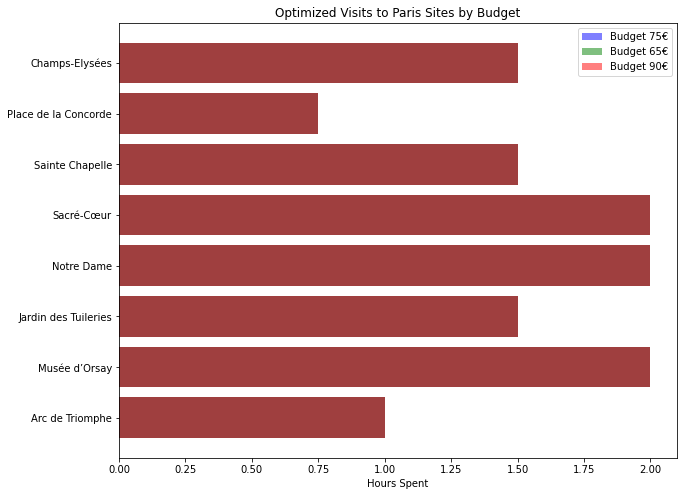

In [9]:
import pulp
import matplotlib.pyplot as plt

# Define the data for each site
sites = {
    'TE': {'duration': 4.5, 'cost': 16.50, 'name': 'Tour Eiffel'},
    'ML': {'duration': 3, 'cost': 14, 'name': 'Musée du Louvre'},
    'AT': {'duration': 1, 'cost': 10.50, 'name': 'Arc de Triomphe'},
    'MO': {'duration': 2, 'cost': 11, 'name': 'Musée d’Orsay'},
    'JT': {'duration': 1.5, 'cost': 0, 'name': 'Jardin des Tuileries'},
    'CA': {'duration': 2, 'cost': 10, 'name': 'Catacombes'},
    'CP': {'duration': 2.5, 'cost': 10, 'name': 'Centre Pompidou'},
    'CN': {'duration': 2, 'cost': 7, 'name': 'Notre Dame'},
    'BS': {'duration': 2, 'cost': 10, 'name': 'Sacré-Cœur'},
    'SC': {'duration': 1.5, 'cost': 8.50, 'name': 'Sainte Chapelle'},
    'PC': {'duration': 0.75, 'cost': 0, 'name': 'Place de la Concorde'},
    'TM': {'duration': 2, 'cost': 12, 'name': 'Tour Montparnasse'},
    'AC': {'duration': 1.5, 'cost': 0, 'name': 'Champs-Elysées'}
}

# Budgets to optimize for
budgets = [75, 65, 90]
colors = ['blue', 'green', 'red']
labels = ['Budget 75€', 'Budget 65€', 'Budget 90€']

def optimize_visit(budget):
    # Define the linear programming problem
    problem = pulp.LpProblem("Maximize_Sites", pulp.LpMaximize)
    
    # Decision variables
    decision_vars = {site: pulp.LpVariable(f'visit_{site}', cat='Binary') for site in sites}

    # Objective function: Maximize the number of sites visited
    problem += pulp.lpSum(decision_vars[site] for site in sites)

    # Time and cost constraints
    problem += pulp.lpSum(decision_vars[site] * sites[site]['duration'] for site in sites) <= 14
    problem += pulp.lpSum(decision_vars[site] * sites[site]['cost'] for site in sites) <= budget
    
    # Solve the problem
    problem.solve()
    
    # Collect results
    results = {sites[site]['name']: pulp.value(decision_vars[site]) * sites[site]['duration'] for site in sites if pulp.value(decision_vars[site]) == 1}
    return results

# Plotting setup
fig, ax = plt.subplots(figsize=(10, 8))

# Gather results for each budget and plot
for idx, budget in enumerate(budgets):
    result = optimize_visit(budget)
    y = list(result.keys())
    x = list(result.values())
    ax.barh(y, x, color=colors[idx], alpha=0.5, label=labels[idx])

ax.set_xlabel('Hours Spent')
ax.set_title('Optimized Visits to Paris Sites by Budget')
ax.legend()

plt.show()